In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('songs_normalize.csv')

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
df.shape

(2000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [7]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [8]:
df.year.value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
1998      1
Name: year, dtype: int64

- Here, it can be seen that the dataset contains songs from the years 1998, 1999 and 2000.
- Since, these releases are few in number, they can be safely dropped.

In [9]:
years_drop = df[(df['year'] < 2000) | (df['year'] > 2019)].index
df.drop(years_drop, inplace = True)

# Artists

In [10]:
artists = df['artist'].value_counts()
artists

Rihanna            25
Drake              23
Eminem             21
Calvin Harris      20
David Guetta       18
                   ..
Tim Berg            1
Counting Crows      1
Yolanda Be Cool     1
Benny Benassi       1
Blanco Brown        1
Name: artist, Length: 819, dtype: int64

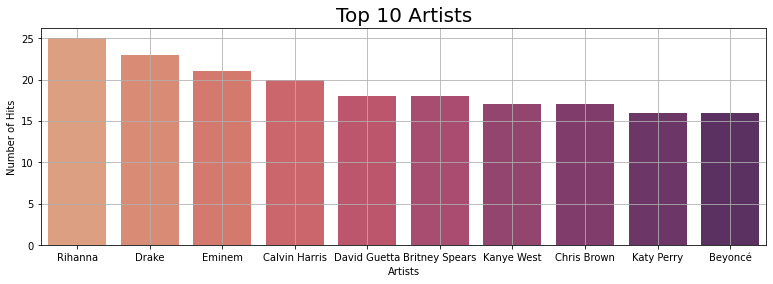

In [13]:
top_10_artists = artists.head(10)
top_10_artists_index = top_10_artists.index
plt.figure(figsize = (13, 4))
sns.barplot(top_10_artists_index, top_10_artists, palette = "flare")
plt.xlabel('Artists')
plt.ylabel('Number of Hits')
plt.title('Top 10 Artists', fontsize = 20)
plt.grid(True)

# Genre

In [14]:
genre = df['genre'].value_counts()
genre

pop                                      416
hip hop, pop                             275
hip hop, pop, R&B                        240
pop, Dance/Electronic                    219
pop, R&B                                 173
hip hop                                  121
hip hop, pop, Dance/Electronic            78
rock                                      57
rock, pop                                 41
Dance/Electronic                          40
rock, metal                               37
pop, rock                                 26
pop, latin                                26
set()                                     21
hip hop, Dance/Electronic                 16
latin                                     15
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
pop, rock, metal                          12
country                                   10
hip hop, pop, rock                         9
metal     

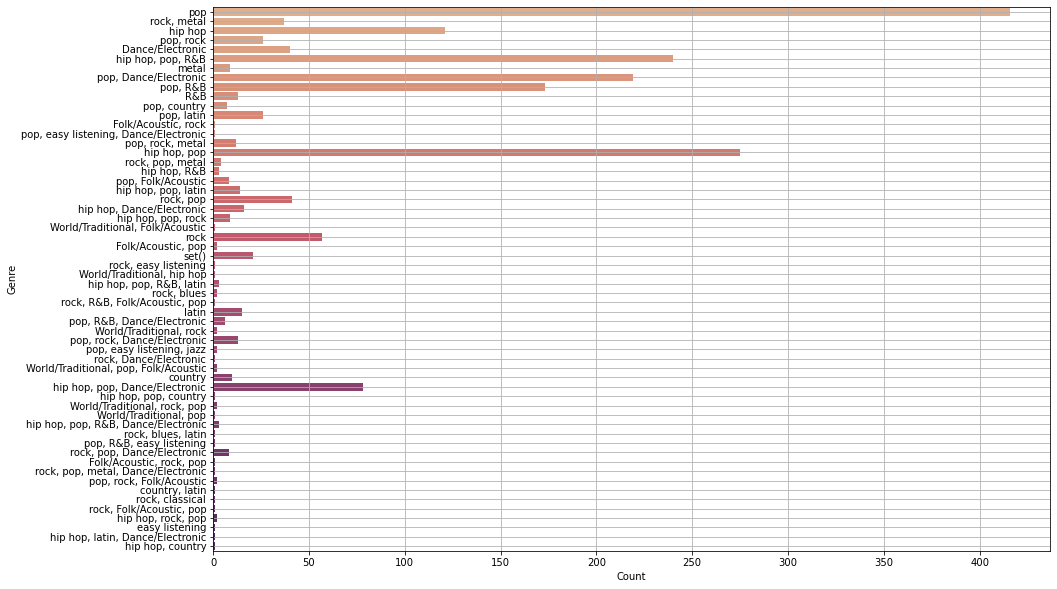

In [15]:
plt.figure(figsize = (15, 10))
sns.countplot(y = df['genre'], palette = 'flare')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True)

- **pop** is the most popular genre.

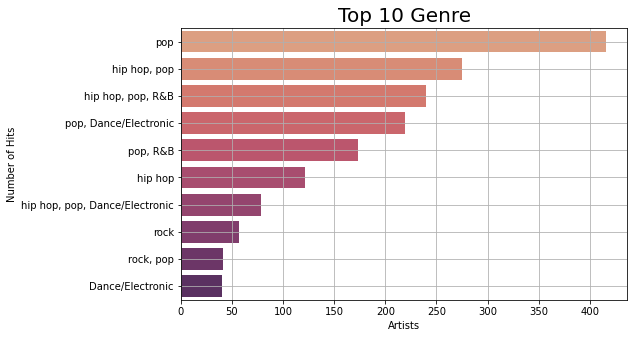

In [16]:
top_10_genre = df['genre'].value_counts().head(10)
top_10_genre_index = top_10_genre.index
plt.figure(figsize = (8, 5))
sns.barplot(top_10_genre, top_10_genre_index, palette = "flare")
plt.xlabel('Artists')
plt.ylabel('Number of Hits')
plt.title('Top 10 Genre', fontsize = 20)
plt.grid(True)

# Songs

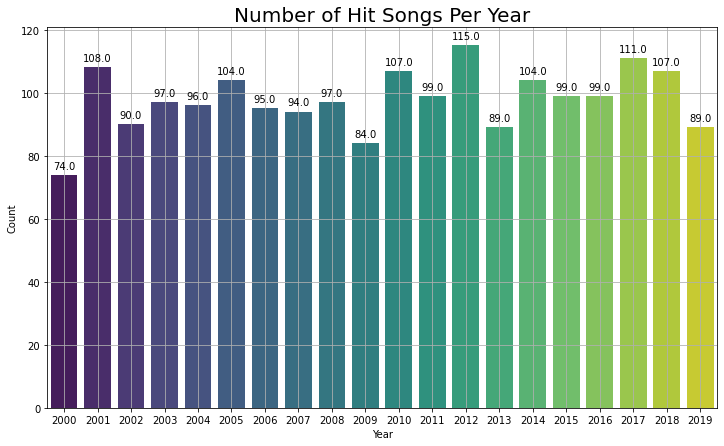

In [52]:
plt.figure(figsize = (12, 7))
no_year = sns.countplot(df['year'], palette = 'viridis')
for p in no_year.patches:
    no_year.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Hit Songs Per Year', fontsize = 20)
plt.grid(True)

### Most Popular Songs by Year

In [18]:
songs = df[['song','artist','year']].groupby('year').max()
songs

,song,artist
year,,
2000,Who Let The Dogs Out,Westlife
2001,Youth of the Nation,Usher
2002,Work It,Vanessa Carlton
2003,You Don't Know My Name,Youngbloodz
2004,Yeah! (feat. Lil Jon & Ludacris),Usher
2005,Your Body,Ying Yang Twins
2006,You're All I Have,iio
2007,Your Love Alone Is Not Enough (feat. Nina Pers...,will.i.am
2008,"You're Gonna Go Far, Kid",Wiley


In [19]:
max_pop = df['popularity'].max()
df[df['popularity'] == max_pop]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


- **Sweater Weather** by **The Neighbourhood** was the most popular song from 2000-2019.

# Duration

In [20]:
def ms_to_min(ms):
    s = ms/1000
    return f"{int(s//60)}:{int(s%60)}"

In [21]:
duration = df[['duration_ms', 'year']].groupby('year').mean()
duration['min:sec'] = duration['duration_ms'].apply(ms_to_min)

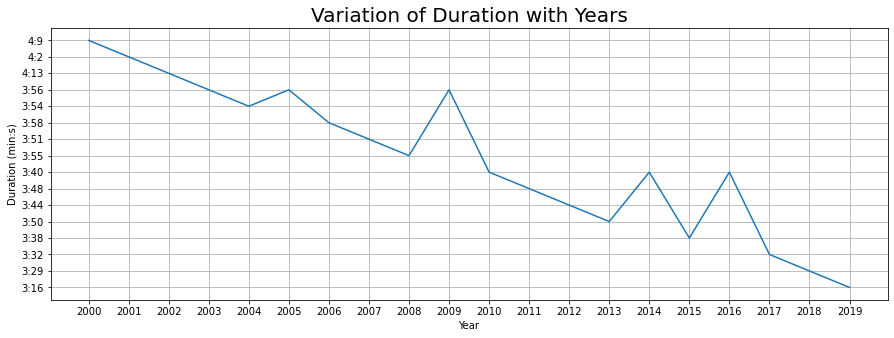

In [22]:
plt.figure(figsize = (15, 5))
sns.lineplot(np.arange(2000, 2020, 1), duration['min:sec'])
plt.xticks(np.arange(2000, 2020, 1))
plt.xlabel('Year')
plt.ylabel('Duration (min:s)')
plt.title('Variation of Duration with Years', fontsize = 20)
plt.grid(True)

- Average duration of songs per year has decreased.

### Longest Song

In [23]:
dur_max = df['duration_ms'].max()
df[df['duration_ms'] == dur_max][['artist', 'year', 'duration_ms', 'song', 'genre']]

,artist,year,duration_ms,song,genre
1381,Justin Timberlake,2013,484146,Mirrors,pop


### Shortest Songs

In [24]:
dur_min = df['duration_ms'].min()
df[df['duration_ms'] == dur_min][['artist', 'year', 'duration_ms', 'song', 'genre']]

,artist,year,duration_ms,song,genre
1931,Lil Nas X,2019,113000,Old Town Road,"hip hop, pop"


# Explicit Songs

In [25]:
df['explicit'].value_counts()

False    1418
True      540
Name: explicit, dtype: int64

Text(0.5, 0, 'Explicit')

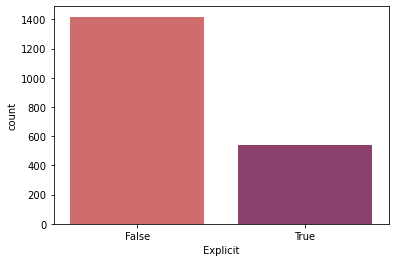

In [26]:
sns.countplot(x = df['explicit'], palette = "flare")
plt.xlabel('Explicit')

- Most top hits are **clean**.

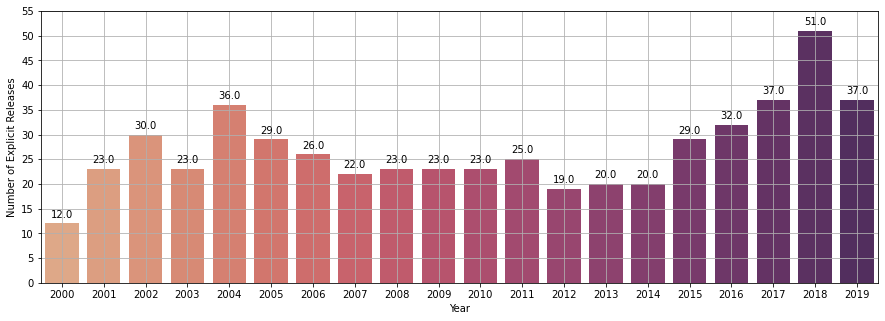

In [27]:
content_type = df[df['explicit'] == True].groupby('year')
explicit_content = content_type['explicit'].count()
plt.figure(figsize = (15, 5))
explicit = sns.barplot(np.arange(2000, 2020, 1), explicit_content, palette = "flare")
for p in explicit.patches:
    explicit.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Year')
plt.ylabel('Number of Explicit Releases')
plt.yticks(np.arange(0, 56, 5))
plt.grid(True)

- Most explicit top-hits were released in **2018**, followed by **2017** and **2019**.

# Popularity

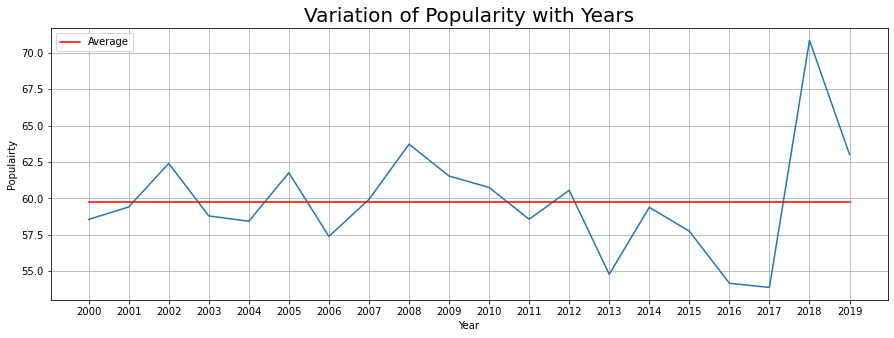

In [50]:
popularity = df[['popularity', 'year']].groupby('year').mean()
mean_pop = popularity.mean()
mean_pop = np.repeat(mean_pop, 20)
plt.figure(figsize = (15, 5))
sns.lineplot(np.arange(2000, 2020, 1), popularity['popularity'])
plt.plot(popularity.index, mean_pop, label = 'Average', color = 'red')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlabel('Year')
plt.ylabel('Populairty')
plt.title('Variation of Popularity with Years', fontsize = 20)
plt.grid(True)
plt.legend()

- Songs released in the year **2018** were some of the most popular hits in the last two decades.

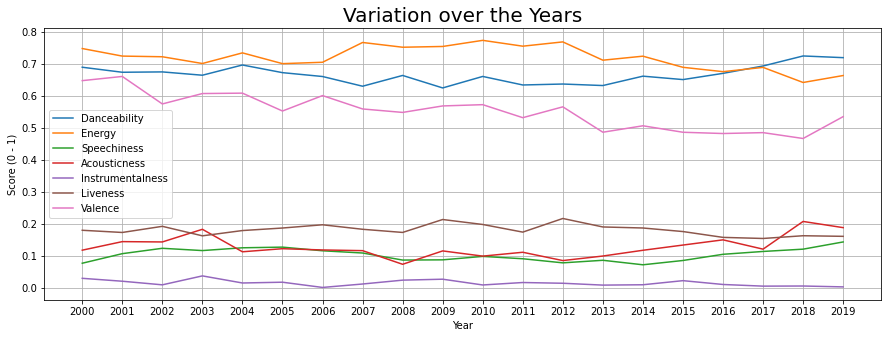

In [29]:
dance_char = df[['danceability', 'year']].groupby('year').mean()
energy_char = df[['energy', 'year']].groupby('year').mean()
speech_char = df[['speechiness', 'year']].groupby('year').mean()
acoustic_char = df[['acousticness', 'year']].groupby('year').mean()
instrument_char = df[['instrumentalness', 'year']].groupby('year').mean()
live_char = df[['liveness', 'year']].groupby('year').mean()
valence_char = df[['valence', 'year']].groupby('year').mean()
plt.figure(figsize = (15, 5))
plt.plot(np.arange(2000, 2020, 1), dance_char['danceability'], label = "Danceability")
plt.plot(np.arange(2000, 2020, 1), energy_char['energy'], label = 'Energy')
plt.plot(np.arange(2000, 2020, 1), speech_char['speechiness'], label = 'Speechiness')
plt.plot(np.arange(2000, 2020, 1), acoustic_char['acousticness'], label = 'Acousticness')
plt.plot(np.arange(2000, 2020, 1), instrument_char['instrumentalness'], label = 'Instrumentalness')
plt.plot(np.arange(2000, 2020, 1), live_char['liveness'], label = 'Liveness')
plt.plot(np.arange(2000, 2020, 1), valence_char['valence'], label = 'Valence')
plt.xticks(np.arange(2000, 2020, 1))
plt.xlabel('Year')
plt.ylabel('Score (0 - 1)')
plt.title('Variation over the Years', fontsize = 20)
plt.grid(True)
plt.legend()

- In most hits, **danceability**, **energy** and **valence** are generally high.
- **Liveness**, **acousticness**, **speechiness**, **instrumentalness** seem to be on the lower side in hit releases, which shows the paradigm shift in trending music from 20th century.
- So, if you are looking to produce music, make sure your songs are energetic, danceable and cheerful. Also, do not forget to speak less.

### Top 10 Most Danceable Songs

In [30]:
dance = df[['song', 'artist', 'danceability', 'genre']].sort_values(by = ['danceability'], ascending = False).head(10)
dance

,song,artist,danceability,genre
714,Give It To Me,Timbaland,0.975,"hip hop, pop, R&B"
425,Trick Me,Kelis,0.970,"pop, R&B, Dance/Electronic"
225,4 My People (feat. Eve),Missy Elliott,0.969,"hip hop, pop, R&B"
602,SexyBack (feat. Timbaland),Justin Timberlake,0.967,pop
618,Get Up (feat. Chamillionaire),Ciara,0.964,"pop, R&B"
1428,Anaconda,Nicki Minaj,0.964,"hip hop, pop"
619,Shake That,Eminem,0.963,hip hop
1856,Yes Indeed,Lil Baby,0.963,hip hop
533,Push The Button,Sugababes,0.962,"pop, R&B"
237,Hot In Herre,Nelly,0.956,"hip hop, pop, R&B"


- Here's a list of top 10 most danceable songs. Now you know which songs to groove over the next time you're having a house party!

# Key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [31]:
df['key'].unique()

array([ 1,  0,  8,  5,  7,  6, 11,  3, 10,  9,  4,  2], dtype=int64)

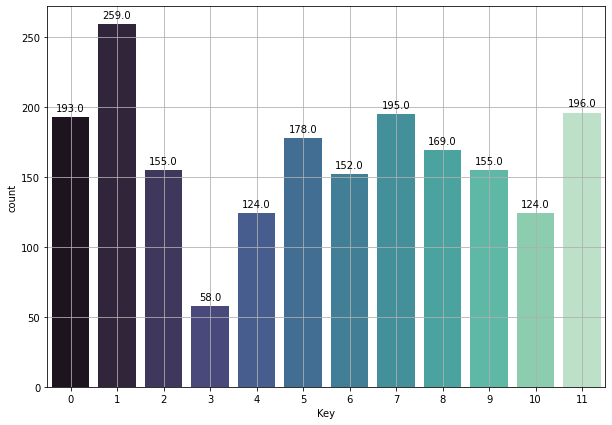

In [32]:
plt.figure(figsize = (10, 7))
key = sns.countplot(df['key'], palette = 'mako')
for p in key.patches:
    key.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Key')
plt.grid(True)

In [33]:
pitch_class_notation = pd.DataFrame({
    'Pitch-class Integer': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'Pitch': ['C', 'C#/D♭', 'D', 'D#/E♭', 'E/F♭', 'F/E#', 'F#/G♭', 'G', 'G#/A♭', 'A', 'A#/B♭', 'B/C♭']
})
pitch_class_notation

,Pitch-class Integer,Pitch
0,0,C
1,1,C#/D♭
2,2,D
3,3,D#/E♭
4,4,E/F♭
5,5,F/E#
6,6,F#/G♭
7,7,G
8,8,G#/A♭
9,9,A


- **C#/D♭ (1)** were the most used keys in the top hits, followed by **B/C♭ (11)** and **G (7)**.

# Mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Text(0, 0.5, 'Count')

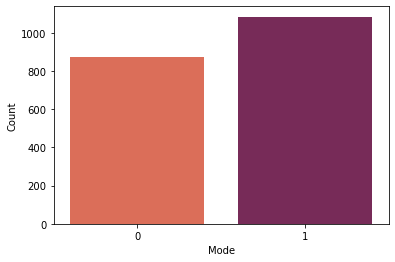

In [35]:
sns.countplot(df['mode'], palette = 'rocket_r')
plt.xlabel('Mode')
plt.ylabel('Count')

- Most hits were in major scale.

# Tempo

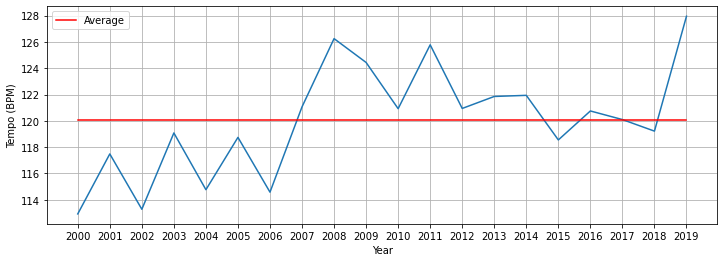

In [44]:
plt.figure(figsize = (12, 4))
tempo = df[['tempo', 'year']].groupby('year').mean()
tempo_mean = tempo['tempo'].mean()
mean = np.repeat(tempo_mean, 20)
sns.lineplot(tempo.index, tempo['tempo'])
plt.plot(tempo.index, mean, color = 'red', label = 'Average')
plt.xticks(np.arange(2000, 2020, 1))
plt.yticks()
plt.xlabel('Year')
plt.ylabel('Tempo (BPM)')
plt.legend()
plt.grid(True)

- Since, the average BPM of hit songs across years has been around 120, it can be said these hit songs are fast paced.

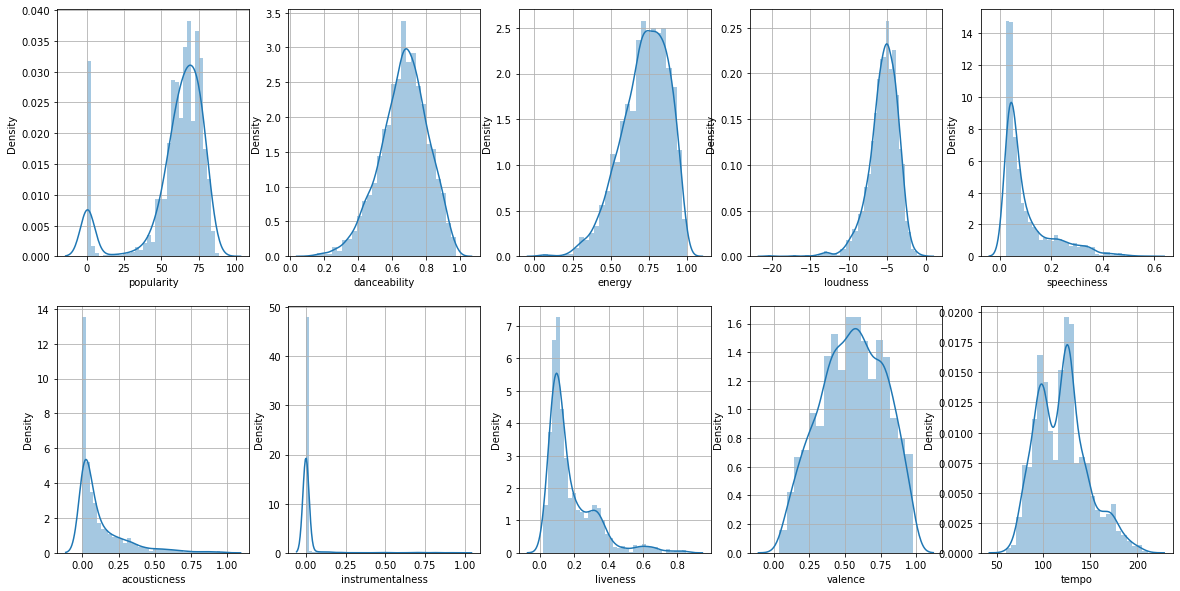

In [45]:
plt.figure(figsize = (20, 10))
count = 1
for col in df[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]:
    plt.subplot(2, 5, count)
    sns.distplot(df[col])
    plt.grid(True)
    count = count + 1

<AxesSubplot:>

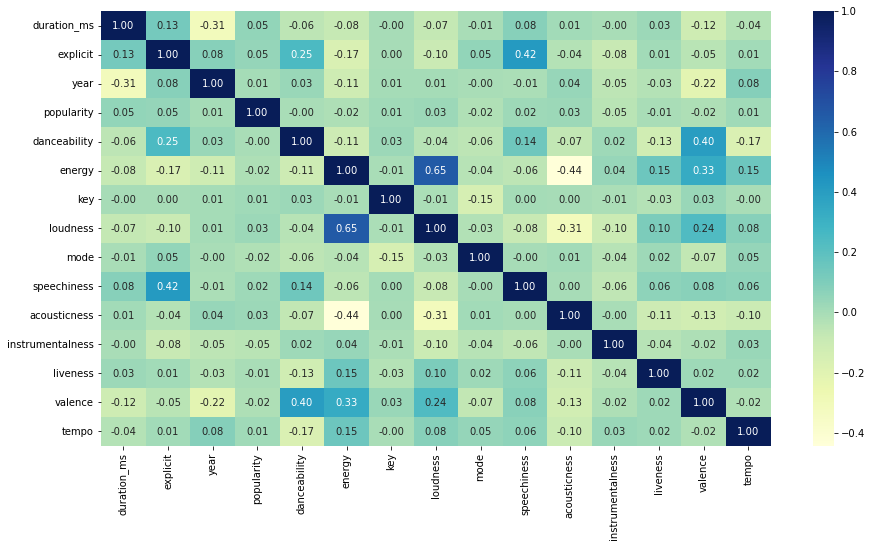

In [47]:
plt.figure(figsize = (15,8))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap="YlGnBu" ,fmt = '.2f')